<a href="https://colab.research.google.com/github/ebi19912/AI/blob/main/Copy_of_Password0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
HUYimport pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from google.colab import drive  # If using Google Colab
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Model Selection and Evaluation Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Classification Models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

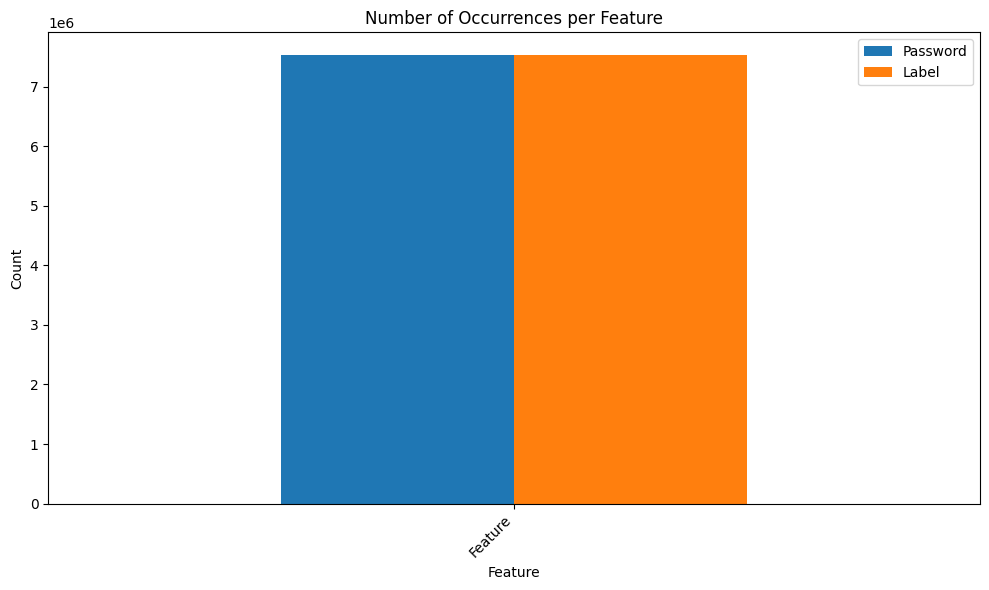

In [ ]:

feature_counts = pd.DataFrame(data.count()).transpose()

feature_counts = feature_counts.rename(index={0:'Feature'})

feature_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Occurrences per Feature')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data = df.dropna(subset=['Password'])


In [ ]:
data['length'] = data['Password'].str.len()
data['uppercase'] = data['Password'].str.contains(r'[A-Z]').astype(int)
data['lowercase'] = data['Password'].str.contains(r'[a-z]').astype(int)
data['digits'] = data['Password'].str.contains(r'\d').astype(int)
data['special'] = data['Password'].str.contains(r'[!@#$%^&*(),.?":{}|<>]').astype(int)
data['is_palindrome'] = data['Password'].apply(lambda x: str(x) == str(x)[::-1])
data['is_sequential'] = data['Password'].apply(lambda x: ''.join(sorted(str(x))) == str(x))
data['has_repeat'] = data['Password'].apply(lambda x: len(x) != len(set(x)))
data['num_unique_chars'] = data['Password'].apply(lambda x: len(set(str(x))))

encoder = LabelEncoder()
data['password_encoded'] = encoder.fit_transform(data['Password'])

smote = SMOTE()
X = data[['password_encoded', 'length', 'uppercase', 'lowercase', 'digits', 'special', 'is_palindrome', 'is_sequential', 'has_repeat', 'num_unique_chars']]
y = data['Label']
X_resampled, y_resampled = smote.fit_resample(X, y)

data_resampled = pd.DataFrame(X_resampled, columns=['password_encoded', 'length', 'uppercase', 'lowercase', 'digits', 'special', 'is_palindrome', 'is_sequential', 'has_repeat', 'num_unique_chars'])
data_resampled['Label'] = y_resampled
data_resampled['Password'] = encoder.inverse_transform(data_resampled['password_encoded'])

print('Number of features:', data_resampled.shape[1])

<ipython-input-7-7c23e4907a94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data['Password'].str.len()
<ipython-input-7-7c23e4907a94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['uppercase'] = data['Password'].str.contains(r'[A-Z]').astype(int)
<ipython-input-7-7c23e4907a94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Number of features: 12


In [ ]:
data_resampled

,password_encoded,length,uppercase,lowercase,digits,special,is_palindrome,is_sequential,has_repeat,num_unique_chars,Label,Password
0,874921,8,1,1,1,0,False,False,True,7,1,Ainslie1
1,3659279,9,0,1,1,0,False,False,True,8,1,jessica18
2,3659873,8,0,1,1,0,False,False,True,6,1,jessie12
3,3659882,8,0,1,1,0,False,False,True,6,1,jessie17
4,3664307,8,0,1,1,0,False,False,False,8,1,jets1234
...,...,...,...,...,...,...,...,...,...,...,...,...
18879397,1041489,8,1,1,1,1,False,False,False,8,2,P@m3l@
18879398,7238703,9,1,1,1,0,False,False,False,8,2,yJiqabiGeDuP
18879399,893116,8,1,1,1,1,False,False,False,8,2,BiNGSIN
18879400,1079253,8,1,1,1,1,False,False,True,7,2,Secret#30


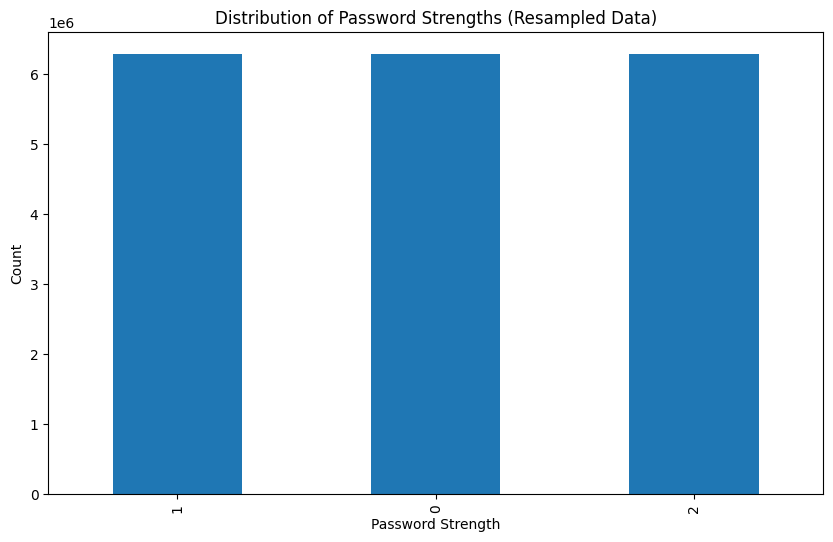

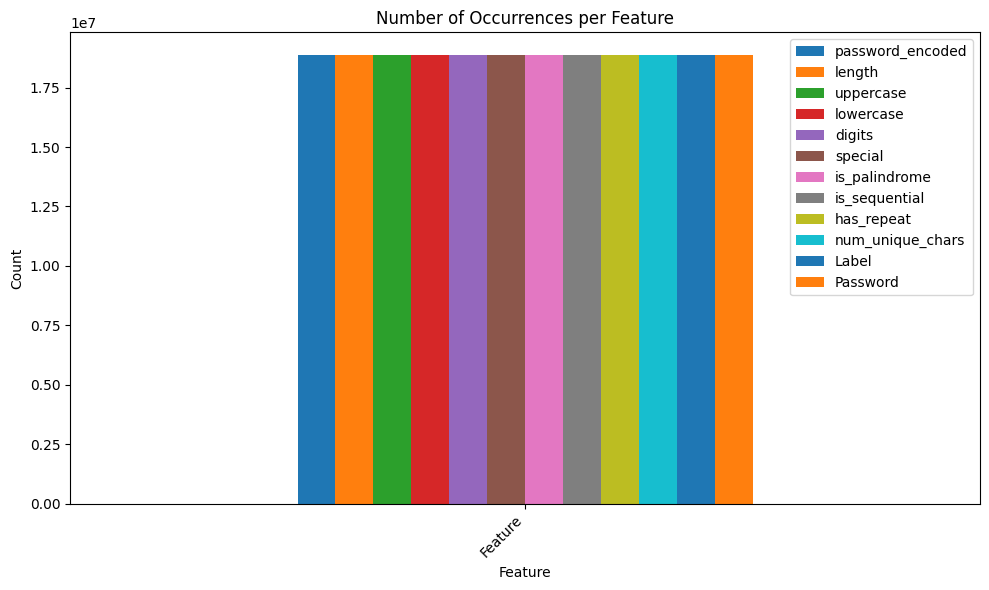

In [ ]:
plt.figure(figsize=(10, 6))
# Calculate the value counts for the 'Label' column in data_resampled
strength_counts_resampled = data_resampled['Label'].value_counts()
strength_counts_resampled.plot(kind='bar')
plt.xlabel('Password Strength')
plt.ylabel('Count')
plt.title('Distribution of Password Strengths (Resampled Data)')
plt.show()


feature_counts = pd.DataFrame(data_resampled.count()).transpose()

feature_counts = feature_counts.rename(index={0:'Feature'})

feature_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Occurrences per Feature')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data=data_resampled

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['password_encoded'] = encoder.fit_transform(data['Password'])

X = data[['password_encoded', 'length', 'uppercase', 'lowercase', 'digits', 'special', 'is_palindrome', 'is_sequential', 'has_repeat', 'num_unique_chars']]
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

print("X_train:\n",X_train.head())
print("X_test:\n",X_test.head())
print("y_train:\n",y_train.head())
print("y_test:\n",y_test.head())


X_train:
           password_encoded  length  uppercase  lowercase  digits  special  \
13797626            925233       9          1          1       1        0   
12981490           1037103       8          1          1       1        1   
8888973            5447774       8          0          1       1        0   
10156439           1031252       9          1          1       1        0   
9963162            7476900       8          0          1       1        0   

          is_palindrome  is_sequential  has_repeat  num_unique_chars  
13797626          False          False        True                 8  
12981490          False          False       False                 8  
8888973           False          False       False                 6  
10156439          False          False        True                 7  
9963162           False          False        True                 6  
X_test:
           password_encoded  length  uppercase  lowercase  digits  special  \
11588355       

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150, 200],  # Try different numbers of estimators
    'learning_rate': [0.05, 0.01],  # Try different learning rates
    'max_depth': [5, 7],  # Try different tree depths
    'subsample': [1.0],  # Try different subsampling rates
    'colsample_bytree': [0.8,1.0],  # Try different feature sampling rates
    # Add other hyperparameters you want to tune
}

# Initialize the GPU-enabled XGBoost Classifier
xgb_model = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    random_state=42,
    verbosity=0
)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the scoring metric
    cv=5,  # Use 5-fold cross-validation
    verbose=2,  # Print detailed output during grid search
)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"XGBoost (GPU) - Accuracy: {accuracy}")
print(f"XGBoost (GPU) - Precision: {precision}")
print(f"XGBoost (GPU) - Recall: {recall}")
print(f"XGBoost (GPU) - F1-score: {f1}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=  18.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=  18.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=  18.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=  18.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=  18.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=1.0; total time=  25.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=1.0; total time=  25.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=150, subsample=1.0; total time=  25.2s
[CV] END c

In [ ]:


# Initialize and train the Random Forest Classifier with the best parameters
rf_model = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest F1-score: {f1}")

Random Forest Accuracy: 0.9666922765839283
Random Forest Precision: 0.9678595899888058
Random Forest Recall: 0.9666922765839283
Random Forest F1-score: 0.9663518405305247


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [20, 30],
    'min_samples_split': [10],
    'min_samples_leaf': [ 2, 4]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest F1-score: {f1}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=26.0min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=26.5min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=28.6min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=26.8min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=27.0min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=39.9min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=40.0min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=42.7min


KeyboardInterrupt: 


Decision Tree:
Accuracy: 0.9878756804370475
Precision: 0.9878761983396289
Recall: 0.9878756804370475
F1-score: 0.987875039690041


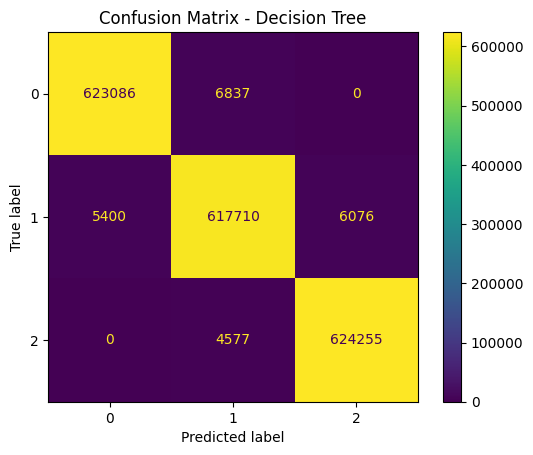


Execution Time: 77.0847 seconds


In [ ]:


start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

print("\nDecision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

ConfusionMatrixDisplay.from_predictions(y_test, dt_pred)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

end_time = time.time()

execution_time = end_time - start_time
print(f"\nExecution Time: {execution_time:.4f} seconds")


/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(



Logistic Regression:
Accuracy: 0.92734306845394
Precision: 0.927754048140274
Recall: 0.92734306845394
F1-score: 0.9270884160156577


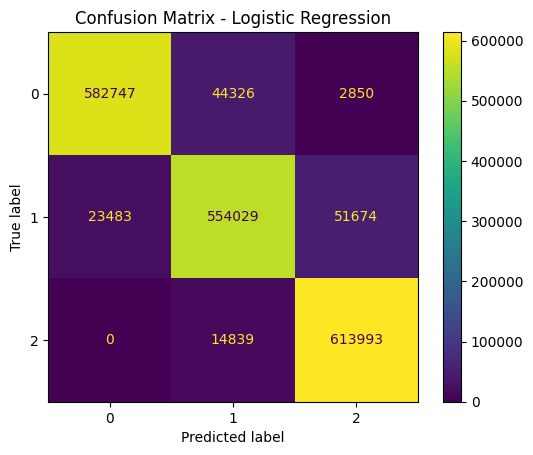


Execution Time: 8756.5544 seconds


In [ ]:
# Logistic Regression

start_time = time.time()

lr = LogisticRegression(penalty='l2',
    C=2.0,
    solver='newton-cg',
    max_iter=1000,
    class_weight='balanced',
)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

print("\nLogistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

end_time = time.time()
execution_time = end_time - start_time

print(f"\nExecution Time: {execution_time:.4f} seconds")



Random Forest:
Accuracy: 0.987633617787844
Precision: 0.9876295414978319
Recall: 0.987633617787844
F1-score: 0.9876285000878865


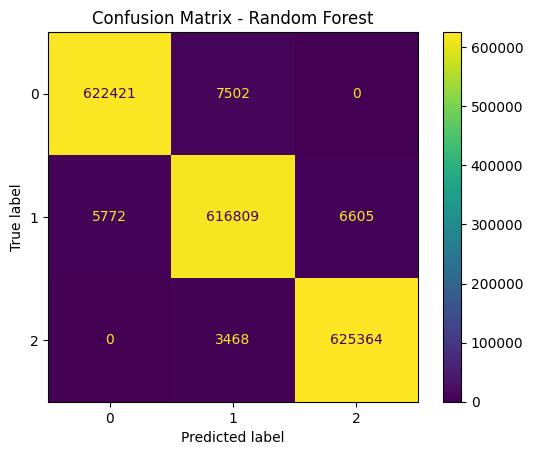


Execution Time: 3188.4402 seconds


In [ ]:

start_time = time.time()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.title("Confusion Matrix - Random Forest")
plt.show()

end_time = time.time()


execution_time = end_time - start_time
print(f"\nExecution Time: {execution_time:.4f} seconds")



K-Nearest Neighbors:
Accuracy: 0.9043005051534979
Precision: 0.9070738573184312
Recall: 0.9043005051534979
F1-score: 0.9047764567994926


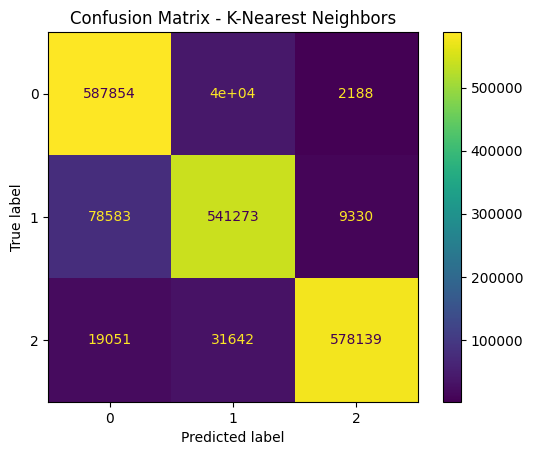


Execution Time: 168.9618 seconds


In [ ]:


start_time = time.time()


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)


knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')


print("\nK-Nearest Neighbors:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)


ConfusionMatrixDisplay.from_predictions(y_test, knn_pred)
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()

end_time = time.time()

execution_time = end_time - start_time
print(f"\nExecution Time: {execution_time:.4f} seconds")


In [ ]:


start_time = time.time()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=2, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('xgb', XGBClassifier(objective='multi:softmax', num_class=3, learning_rate=0.1, max_depth=5, n_estimators=150, gamma=0.2, subsample=0.8)),
    ('ada', AdaBoostClassifier(n_estimators=50, learning_rate=0.1, estimator=DecisionTreeClassifier(max_depth=3))),
    ('knn', KNeighborsClassifier(n_neighbors=2)),
    ('dt', DecisionTreeClassifier())
]

meta_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='newton-cg')

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

stacking_pred = stacking_clf.predict(X_test)

stacking_accuracy = accuracy_score(y_test, stacking_pred)
stacking_precision = precision_score(y_test, stacking_pred, average='weighted')
stacking_recall = recall_score(y_test, stacking_pred, average='weighted')
stacking_f1 = f1_score(y_test, stacking_pred, average='weighted')

print("\nStacking Classifier:")
print("Accuracy:", stacking_accuracy)
print("Precision:", stacking_precision)
print("Recall:", stacking_recall)
print("F1-score:", stacking_f1)

ConfusionMatrixDisplay.from_predictions(y_test, stacking_pred)
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()

end_time = time.time()
execution_time = end_time - start_time
print(f"\nExecution Time: {execution_time:.4f} seconds")


KeyboardInterrupt: 

In [ ]:
# prompt: give me a code for from RandomForestClassifier, i need to run this code fast(with gpu, high ram or anything you can)
# i need high accuracy for this model

# ... (Your existing code)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, max_depth=100, min_samples_split=5, min_samples_leaf=2, random_state=42, n_jobs=-1) #n_jobs=-1 uses all available CPU cores
rf_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest F1-score: {f1}")

Random Forest Accuracy: 0.987547541884927
Random Forest Precision: 0.9875506956499491
Random Forest Recall: 0.987547541884927
Random Forest F1-score: 0.9875256957055384


In [ ]:
# prompt: give me a code for from DecisionTreeClassifier, i need to run this code fast(with gpu,high ram or anything you can)
# i need high accuracy for this model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# ... (Your existing code for data preprocessing and feature engineering)

# Define the parameter grid for hyperparameter tuning (more extensive search)
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'splitter': ['best', 'random'],  # Splitting strategy
    'max_depth': [40, 50],  # Maximum depth of the tree
    'min_samples_split': [5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [2, 4],  # Minimum samples to be a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'class_weight': ['balanced'] # Handling class imbalance
}


# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)


# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the scoring metric
    cv=5,  # Use 5-fold cross-validation (or more for better results, but slower)
    n_jobs=-1, # Utilize all available CPU cores
    verbose=2  # Print detailed output during grid search
)


# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_dt_model = grid_search.best_estimator_


# Make predictions using the best model
y_pred = best_dt_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Decision Tree - Accuracy: {accuracy}")
print(f"Decision Tree - Precision: {precision}")
print(f"Decision Tree - Recall: {recall}")
print(f"Decision Tree - F1-score: {f1}")
print(f"Decision Tree Best parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [ ]:
# prompt: give me a code for from LogisticRegression, i need to run this code fast(with gpu,high ram or anything you can)
# i need high accuracy for this model

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# ... (Your existing code for data loading, preprocessing, and feature engineering)

# Feature Scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with optimized parameters
lr_model = LogisticRegression(
    penalty='l2',  # Use L2 regularization
    C=1.0,  # Adjust regularization strength as needed
    solver='saga',  # Efficient solver for large datasets
    max_iter=1000,  # Increase maximum iterations if needed
    multi_class='multinomial', # Handle multiple classes
    n_jobs=-1 # Use all processors
)

lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Logistic Regression - Accuracy: {accuracy}")
print(f"Logistic Regression - Precision: {precision}")
print(f"Logistic Regression - Recall: {recall}")
print(f"Logistic Regression - F1-score: {f1}")


In [ ]:
# prompt: give me a code for from xgb, i need to run this code fast(with gpu,high ram or anything you can)
# i need high accuracy for this model

!pip install xgboost==1.7.4
!pip install scikit-learn
!pip install imblearn

import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from your previous code
# ... (Your existing code for data preprocessing and feature engineering)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier with GPU acceleration and optimized parameters
xgb_model = xgb.XGBClassifier(
    tree_method='gpu_hist',  # Use GPU for tree construction
    predictor='gpu_predictor',  # Use GPU for prediction
    objective='multi:softmax',  # Multi-class classification
    num_class=len(set(y)),      # Number of classes
    eval_metric='mlogloss',    # Evaluation metric (logloss for multi-class)
    use_label_encoder=False,    # No need for label encoding with 'multi:softmax'
    n_estimators=500,            # Increase the number of estimators
    learning_rate=0.05,         # Reduce learning rate for better convergence
    max_depth=10,                # Increase tree depth (be mindful of overfitting)
    subsample=0.8,              # Subsampling rate
    colsample_bytree=0.8,        # Column subsampling rate
    gamma=0.1,                   # Minimum loss reduction required to make a further partition
    reg_alpha=0.1,               # L1 regularization
    reg_lambda=1.0,              # L2 regularization
    min_child_weight=1,          # Minimum sum of instance weight (hessian) needed in a child
    random_state=42,            # Seed for reproducibility
)


# Train the model
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True, early_stopping_rounds=20) #add early stopping

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"XGBoost (GPU) - Accuracy: {accuracy}")
print(f"XGBoost (GPU) - Precision: {precision}")
print(f"XGBoost (GPU) - Recall: {recall}")
print(f"XGBoost (GPU) - F1-score: {f1}")


In [ ]:
# prompt: give me a code for from AdaBoostClassifier, i need to run this code fast(with gpu,high ram or anything you can)
# i need high accuracy for this model

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# ... (Your existing code for data loading, preprocessing, and feature engineering)

start_time = time.time()

# Split data (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimized AdaBoostClassifier
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=10), # Increased depth for base estimator
    n_estimators=500,  # Increased number of estimators for better accuracy
    learning_rate=0.05 # Reduced learning rate for improved convergence
)


ada_model.fit(X_train, y_train)

ada_pred = ada_model.predict(X_test)

ada_accuracy = accuracy_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred, average='weighted')
ada_recall = recall_score(y_test, ada_pred, average='weighted')
ada_f1 = f1_score(y_test, ada_pred, average='weighted')

print("\nAdaBoost (Optimized):")
print("Accuracy:", ada_accuracy)
print("Precision:", ada_precision)
print("Recall:", ada_recall)
print("F1-score:", ada_f1)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


In [ ]:
# prompt: give me a code for from KNeighborsClassifier, i need to run this code fast(with gpu,high ram or anything you can)
# i need high accuracy for this model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time

# ... (Your existing code for data loading, preprocessing, and feature engineering)

start_time = time.time()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [7, 9, 11],  # Try different values for k
    'weights': ['uniform', 'distance'],  # Weighting methods
    'algorithm': ['ball_tree', 'kd_tree', 'brute'], # Algorithms to compute nearest neighbors
    'p': [1, 2]  # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')

print("\nK-Nearest Neighbors (Optimized):")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)
print(f"Best parameters: {grid_search.best_params_}")


end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")

# ... (rest of your code)


In [ ]:
# prompt: give me a code for from GradientBoostingClassifier, i need to run this code fast(with gpu,high ram or anything you can)
# i need high accuracy for this model

import xgboost as xgb

# Initialize and train the GradientBoostingClassifier with optimized parameters
gb_model = GradientBoostingClassifier(
    n_estimators=200,  # Increased number of estimators
    learning_rate=0.1,
    max_depth=7,  # Increased maximum depth
    subsample=0.8,  # Added subsampling
    max_features='sqrt', # Added max features
    random_state=42
)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Gradient Boosting - Accuracy: {accuracy}")
print(f"Gradient Boosting - Precision: {precision}")
print(f"Gradient Boosting - Recall: {recall}")
print(f"Gradient Boosting - F1-score: {f1}")
